In [ ]:
# Linear Regression

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.shape

(25, 2)

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


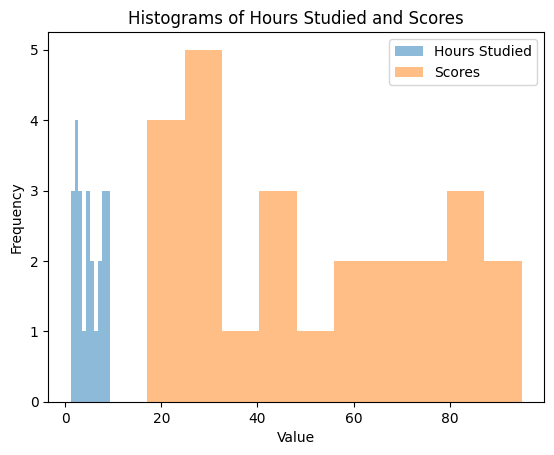

In [ ]:
plt.hist(df['Hours'], bins=10, alpha=0.5, label='Hours Studied')
plt.hist(df['Scores'], bins=10, alpha=0.5, label='Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histograms of Hours Studied and Scores')
plt.show()


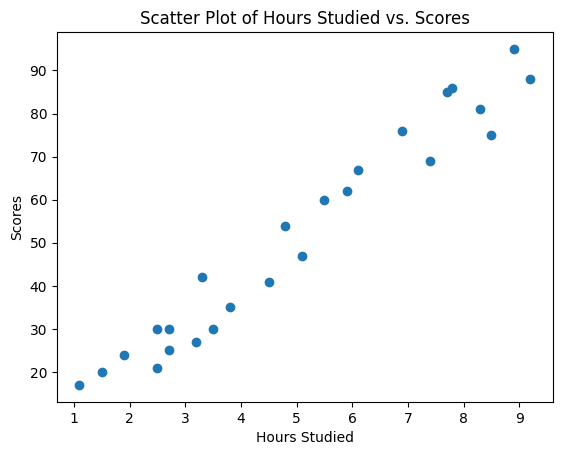

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Scatter Plot of Hours Studied vs. Scores')
plt.show()


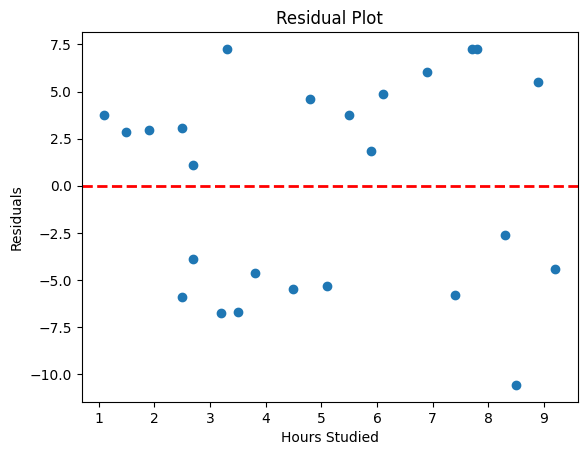

In [ ]:
residuals = Y - Y_pred
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Hours Studied')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


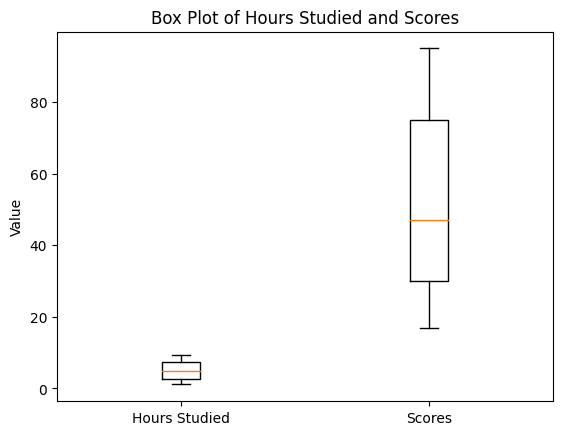

In [ ]:
plt.boxplot([data['Hours'], data['Scores']], labels=['Hours Studied', 'Scores'])
plt.ylabel('Value')
plt.title('Box Plot of Hours Studied and Scores')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
X=df["Hours"]
Y=df["Scores"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train.values.reshape(-1,1))
X_test= scaler_X.transform(X_test.values.reshape(-1,1))

In [ ]:
linreg=LinearRegression()

In [ ]:
linreg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred=linreg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f'R-squared (R2) score: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')



R-squared (R2) score: 0.97
RMSE: 4.35


In [ ]:
import matplotlib.pyplot as plt

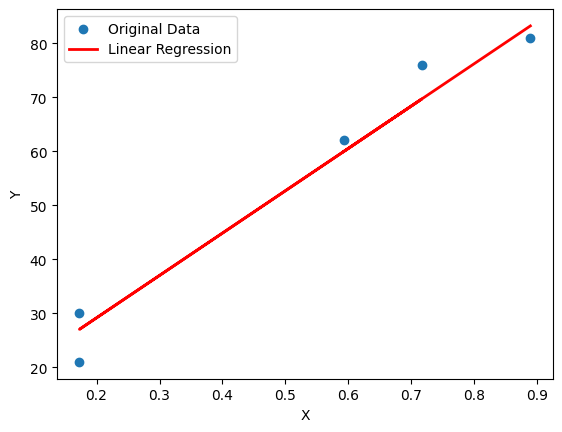

In [ ]:
plt.scatter(X_test, Y_test, label='Original Data')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
df_new= pd.DataFrame(list(zip(df.Hours, Y_test, Y_pred)), columns=['Hours', 'Actual_Y', 'Predicted_Y'])
print(df_new)

   Hours  Actual_Y  Predicted_Y
0    2.5        81    83.188141
1    5.1        30    27.032088
2    3.2        21    27.032088
3    8.5        76    69.633232
4    3.5        62    59.951153


In [ ]:
#Predicted score if a student studied for 9.2 hrs per day?

In [ ]:
hours_studied = 9.25
scaled_hours = scaler_X.transform([[hours_studied]])
predicted_score = linreg.predict(scaled_hours)
print(f'Predicted score for {hours_studied} hours of study: {predicted_score[0]:.2f}')

Predicted score for 9.25 hours of study: 92.39
